In [2]:
# Importações
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display, clear_output
from concurrent.futures import ThreadPoolExecutor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display_html
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from itertools import combinations
from sklearn import linear_model
from graphviz import Digraph
from sklearn import tree
from PyPDF2 import PdfMerger
from scipy import stats

import matplotlib.backends.backend_pdf as pltpdf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import dask.dataframe as dd
import graphviz as gv
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import graphviz
import warnings
import os
import re

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [3]:
# Leitura do arquivo CSV em partes (chunks) para otimização de uso de memória
csv_file_path = "DrDoS_UDP.csv"
dados = []

In [4]:
# Carregue seus dados (substitua 'seus_dados.csv' pelo nome do seu arquivo)
dados = pd.read_csv(csv_file_path, low_memory=False)

In [5]:
amostra = dados

In [6]:
dados.columns = dados.columns.str.strip()
display(dados.describe())
print(dados.columns)

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,...,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06
mean,6.284729e+04,4.678466e+04,3.326777e+04,1.699073e+01,9.454659e+04,3.769507e+00,5.931838e-03,1.370530e+03,1.257003e+00,3.885615e+02,...,-3.979974e+07,1.441213e+02,5.098763e+01,1.891834e+02,1.061237e+02,2.348633e+03,1.030996e+02,2.454045e+03,2.266851e+03,9.988192e-01
std,3.640744e+04,8.463285e+03,1.865171e+04,3.255629e-01,6.825386e+05,3.745687e+00,6.018696e-01,1.120631e+03,2.431255e+02,4.950828e+01,...,2.017720e+08,5.206479e+04,3.149175e+04,6.879844e+04,4.339355e+04,3.168890e+05,3.667490e+04,3.264913e+05,3.117682e+05,3.434278e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.136800e+04,3.980600e+04,1.715900e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,7.660000e+02,0.000000e+00,3.750000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,6.273600e+04,4.689400e+04,3.329400e+04,1.700000e+01,1.320000e+02,4.000000e+00,0.000000e+00,1.398000e+03,0.000000e+00,3.890000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,9.410400e+04,5.389600e+04,4.942600e+04,1.700000e+01,1.088440e+05,4.000000e+00,0.000000e+00,1.438000e+03,0.000000e+00,3.930000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.325940e+05,6.553100e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.232000e+03,3.610000e+02,5.907600e+04,2.057900e+05,3.547000e+03,...,1.472000e+03,6.151289e+07,4.868047e+07,7.286843e+07,6.151289e+07,1.166865e+08,3.551041e+07,1.166865e+08,1.166865e+08,1.000000e+00


Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [7]:
dados_tr = amostra
dados_tr.reset_index(drop=True, inplace=True)

In [8]:
#amostra2 = dados[dados['Label'].str.contains('BENIGN')]
## Concatenar amostra e amostra2
#dados_tr = pd.concat([amostra, amostra2])

# Redefinir o índice do DataFrame concatenado
#dados_tr.reset_index(drop=True, inplace=True)

In [9]:
# Lista das colunas a serem selecionadas
#colunas_selecionadas = ['Fwd Packet Length Std', 'Packet Length Std', 'Fwd IAT Mean', 'min_seg_size_forward',
#                        'Fwd IAT Max', 'Destination Port', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
#                        'Fwd Packet Length Min', 'Protocol', 'Timestamp', 'Label']

# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Timestamp', 'Label']

# Remova espaços em branco dos nomes das colunas
dados_tr.columns = dados_tr.columns.str.strip()


# Verifique se todas as colunas selecionadas estão no DataFrame
if set(colunas_selecionadas).issubset(dados_tr.columns):
    # Selecionar apenas as colunas desejadas
    df_dados = dados_tr[colunas_selecionadas]
    # Remover colunas duplicadas
    df_dados = df_dados.loc[:,~df_dados.columns.duplicated()]
    df_dados = df_dados.dropna()

    # Mostrar todas as colunas disponíveis no novo DataFrame
    print("Colunas Selecionadas:")
    print(df_dados.columns)
    print("\n")
    display(df_dados)
else:
    print(dados_tr.columns)
    print(dados_tr)
    print("Nomes das colunas selecionadas não correspondem às colunas no DataFrame.")

Colunas Selecionadas:
Index(['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward',
       'Destination Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')




,Fwd Packet Length Mean,Fwd IAT Mean,min_seg_size_forward,Destination Port,Protocol,Timestamp,Label
0,348.0,43679.000000,-1,6652,17,2018-12-01 12:36:57.628026,DrDoS_UDP
1,349.5,36073.000000,-1,9712,17,2018-12-01 12:36:57.628076,DrDoS_UDP
2,359.5,34859.666667,-1,4680,17,2018-12-01 12:36:57.628164,DrDoS_UDP
3,386.0,36989.000000,-1,2644,17,2018-12-01 12:36:57.628166,DrDoS_UDP
4,383.0,1.000000,-1,16901,17,2018-12-01 12:36:57.628217,DrDoS_UDP
...,...,...,...,...,...,...,...
3136797,401.0,2.000000,20,6479,17,2018-12-01 13:04:45.928050,DrDoS_UDP
3136798,401.0,1.000000,20,33462,17,2018-12-01 13:04:45.928055,DrDoS_UDP
3136799,321.0,2.000000,20,22593,17,2018-12-01 13:04:45.928173,DrDoS_UDP
3136800,375.0,2.000000,20,46618,17,2018-12-01 13:04:45.928225,DrDoS_UDP


# Classifier comparison

In [10]:
# Converta a coluna 'Timestamp' para objetos datetime
df_dados['Timestamp'] = pd.to_datetime(df_dados['Timestamp'])

# Calcule o número de segundos desde a época Unix
df_dados['Timestamp_seconds'] = (df_dados['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Defina os horários de início e fim do intervalo desejado
start_time = pd.to_datetime('12:54:00').time()
end_time = pd.to_datetime('12:55:00').time()

# Filtrar o DataFrame pelo intervalo de tempo
df_dados = df_dados[(df_dados['Timestamp'].dt.time >= start_time) & (df_dados['Timestamp'].dt.time <= end_time)]
display(df_dados)

# Preparar os dados
X = df_dados.drop('Label', axis=1)
X = X.drop('Timestamp', axis=1)
y = df_dados['Label']


# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

,Fwd Packet Length Mean,Fwd IAT Mean,min_seg_size_forward,Destination Port,Protocol,Timestamp,Label,Timestamp_seconds
71127,0.0,600136.400000,40,22,6,2018-12-01 12:54:07.177736,DrDoS_UDP,1543668847
71128,1472.0,5.000000,40,55060,17,2018-12-01 12:54:09.162039,DrDoS_UDP,1543668849
71129,520.0,3.000000,40,55060,17,2018-12-01 12:54:09.162137,DrDoS_UDP,1543668849
71130,1472.0,3.000000,40,45100,17,2018-12-01 12:54:09.371612,DrDoS_UDP,1543668849
71131,520.0,3.000000,40,45100,17,2018-12-01 12:54:09.371796,DrDoS_UDP,1543668849
...,...,...,...,...,...,...,...,...
92598,349.5,35375.333333,0,26954,17,2018-12-01 12:54:59.998739,DrDoS_UDP,1543668899
92599,383.0,1.000000,0,43224,17,2018-12-01 12:54:59.998802,DrDoS_UDP,1543668899
92600,401.0,1.000000,0,36668,17,2018-12-01 12:54:59.999169,DrDoS_UDP,1543668899
92601,401.0,1.000000,0,16185,17,2018-12-01 12:54:59.999171,DrDoS_UDP,1543668899


In [11]:
# Classificador logístico
lr = LogisticRegression()

# Árvore de decisão
dt = DecisionTreeClassifier(max_depth=5)

# Cria a floresta aleatória
rf = RandomForestClassifier(max_depth=5)

In [12]:
# Treinar o classificador logístico
lr.fit(X_train, y_train)

# Treinar a árvore de decisão
dt.fit(X_train, y_train)

# Treinar a floresta aleatória
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [13]:
# Fazer previsões com o classificador logístico
y_pred_lr = lr.predict(X_test)

# Fazer previsões com a árvore de decisão
y_pred_dt = dt.predict(X_test)

# Fazer previsões com a floresta aleatória
y_pred_rf = rf.predict(X_test)

# Avaliar os classificadores
print('')
print('Classificador logístico:')
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print('')
print('Árvore de decisão:')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print('')
print('Floresta aleatória:')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Classificador logístico:
              precision    recall  f1-score   support

      BENIGN       1.00      0.03      0.06        62
   DrDoS_UDP       0.99      1.00      0.99      5307

    accuracy                           0.99      5369
   macro avg       0.99      0.52      0.53      5369
weighted avg       0.99      0.99      0.98      5369

[[   2   60]
 [   0 5307]]

Árvore de decisão:
              precision    recall  f1-score   support

      BENIGN       0.98      0.98      0.98        62
   DrDoS_UDP       1.00      1.00      1.00      5307

    accuracy                           1.00      5369
   macro avg       0.99      0.99      0.99      5369
weighted avg       1.00      1.00      1.00      5369

[[  61    1]
 [   1 5306]]

Floresta aleatória:
              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99        62
   DrDoS_UDP       1.00      1.00      1.00      5307

    accuracy                           1.00      5369
   macr

In [14]:

# Métricas para o classificador logístico
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr_dr = report_lr['DrDoS_UDP']['precision']
recall_lr_dr = report_lr['DrDoS_UDP']['recall']
f1_score_lr_dr = report_lr['DrDoS_UDP']['f1-score']
precision_lr_benign = report_lr['BENIGN']['precision']
recall_lr_benign = report_lr['BENIGN']['recall']
f1_score_lr_benign = report_lr['BENIGN']['f1-score']

# Métricas para a árvore de decisão
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt_dr = report_dt['DrDoS_UDP']['precision']
recall_dt_dr = report_dt['DrDoS_UDP']['recall']
f1_score_dt_dr = report_dt['DrDoS_UDP']['f1-score']
precision_dt_benign = report_dt['BENIGN']['precision']
recall_dt_benign = report_dt['BENIGN']['recall']
f1_score_dt_benign = report_dt['BENIGN']['f1-score']

# Métricas para a floresta aleatória
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf_dr = report_rf['DrDoS_UDP']['precision']
recall_rf_dr = report_rf['DrDoS_UDP']['recall']
f1_score_rf_dr = report_rf['DrDoS_UDP']['f1-score']
precision_rf_benign = report_rf['BENIGN']['precision']
recall_rf_benign = report_rf['BENIGN']['recall']
f1_score_rf_benign = report_rf['BENIGN']['f1-score']

classificadores = ['Logístico', 'Árvore de Decisão', 'Floresta Aleatória']
precisao_dr = [precision_lr_dr, precision_dt_dr, precision_rf_dr]
recall_dr = [recall_lr_dr, recall_dt_dr, recall_rf_dr]
f1_dr = [f1_score_lr_dr, f1_score_dt_dr, f1_score_rf_dr]
precisao_benign = [precision_lr_benign, precision_dt_benign, precision_rf_benign]
recall_benign = [recall_lr_benign, recall_dt_benign, recall_rf_benign]
f1_benign = [f1_score_lr_benign, f1_score_dt_benign, f1_score_rf_benign]

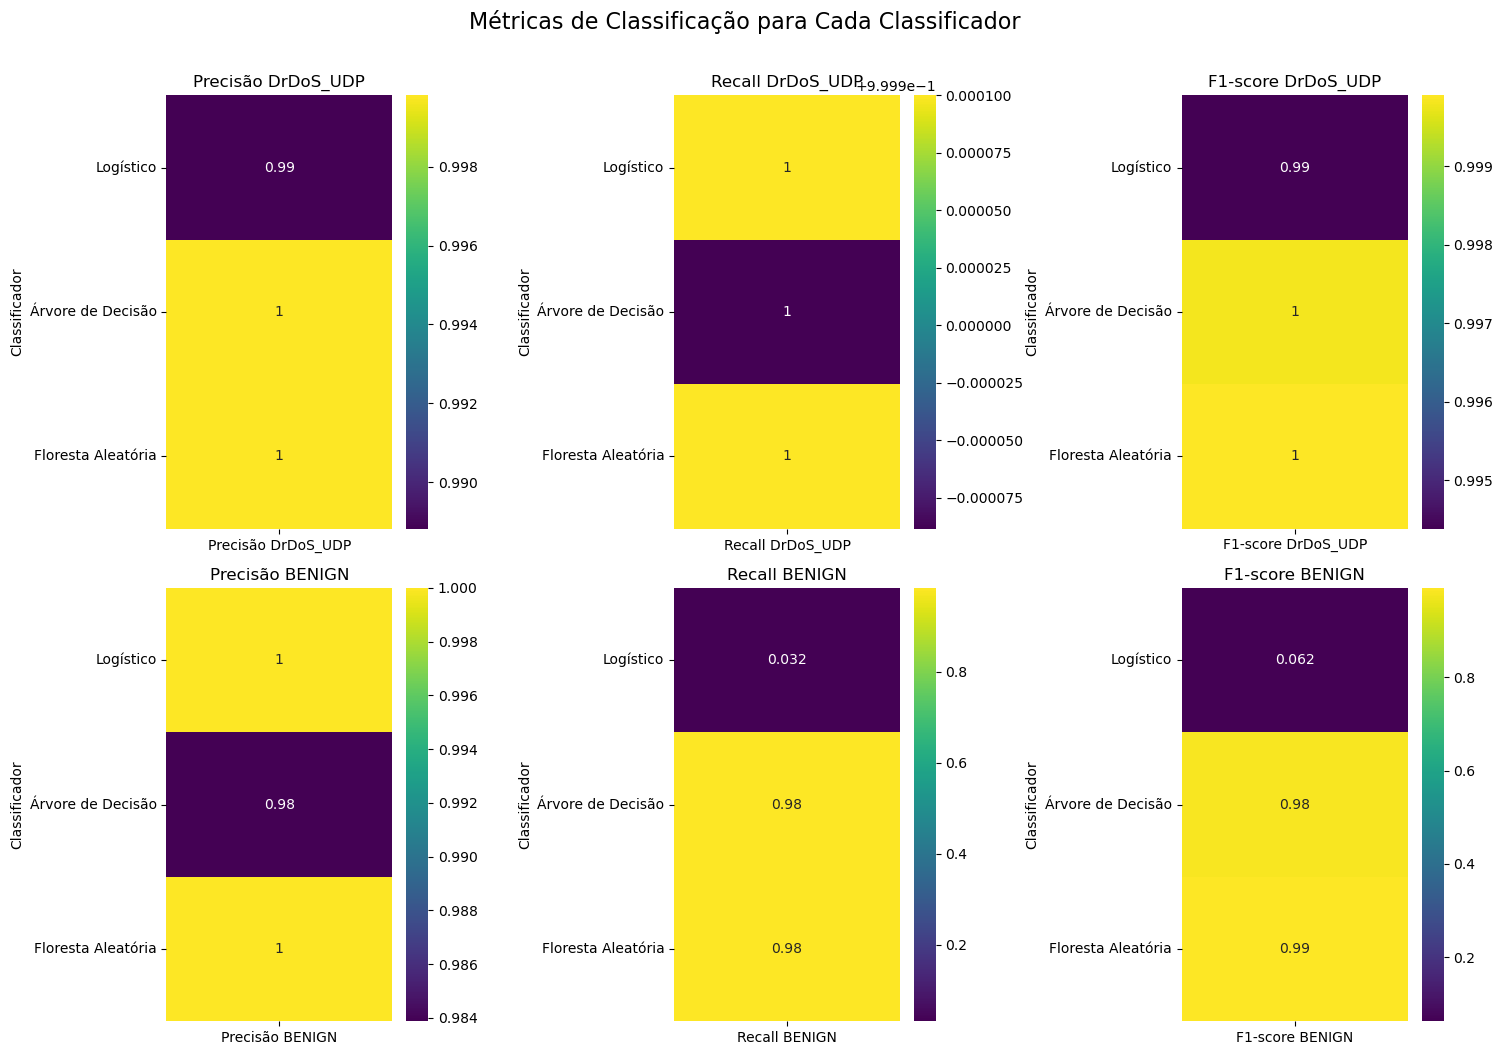

In [15]:
# Cria um dataframe para cada métrica
df_precisao_dr = pd.DataFrame({'Classificador': classificadores, 'Precisão DrDoS_UDP': precisao_dr})
df_recall_dr = pd.DataFrame({'Classificador': classificadores, 'Recall DrDoS_UDP': recall_dr})
df_f1_dr = pd.DataFrame({'Classificador': classificadores, 'F1-score DrDoS_UDP': f1_dr})

df_precisao_benign = pd.DataFrame({'Classificador': classificadores, 'Precisão BENIGN': precisao_benign})
df_recall_benign = pd.DataFrame({'Classificador': classificadores, 'Recall BENIGN': recall_benign})
df_f1_benign = pd.DataFrame({'Classificador': classificadores, 'F1-score BENIGN': f1_benign})

# Cria um mapa de calor para cada métrica
fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
sns.heatmap(df_precisao_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Precisão DrDoS_UDP')

plt.subplot(232)
sns.heatmap(df_recall_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Recall DrDoS_UDP')

plt.subplot(233)
sns.heatmap(df_f1_dr.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('F1-score DrDoS_UDP')

plt.subplot(234)
sns.heatmap(df_precisao_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Precisão BENIGN')

plt.subplot(235)
sns.heatmap(df_recall_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('Recall BENIGN')

plt.subplot(236)
sns.heatmap(df_f1_benign.set_index('Classificador'), annot=True, cmap='viridis')
plt.title('F1-score BENIGN')

plt.tight_layout()

# Adiciona um título ao gráfico
fig.suptitle('Métricas de Classificação para Cada Classificador', fontsize=16, y=1.05)
plt.savefig('img_com_intervalo/metricas_de_classificacao_para_classificador_comparaty_plot.png', dpi=300, bbox_inches='tight')  # Salvar o gráfico em alta resolução (dpi=300)
plt.show()

In [16]:
# Imprimir o número de árvores
print(rf.n_estimators)

# Imprimir a profundidade máxima de cada árvore
print(rf.max_depth)

# Imprimir os valores de `min_samples_split` e `min_samples_leaf`
print(rf.min_samples_split, rf.min_samples_leaf)

100
5
2 1


# Unica arvore

In [17]:
# Obtém o número de recursos no modelo de árvore de decisão
n_features_in = rf.estimators_[0].n_features_in_

# Usa o atributo 'classes_' para obter os rótulos das classes
class_names = rf.classes_

dot_data = export_graphviz(rf.estimators_[0], out_file='img_com_intervalo/tree_com_corte.dot', feature_names=df_dados.columns[:n_features_in], class_names=class_names, filled=True, rounded=True, special_characters=True)

# Abre o arquivo .dot e lê o conteúdo
with open('img_com_intervalo/tree_com_corte.dot', 'r') as f:
    dot_text = f.read()

# Substitui os termos em inglês por suas traduções em português
dot_text = re.sub("gini", "Índice Gini", dot_text)
dot_text = re.sub("samples", "Amostras", dot_text)
dot_text = re.sub("value", "Valor", dot_text)
dot_text = re.sub("class", "Classe", dot_text)

# Escreve o texto modificado de volta para o arquivo .dot
with open('tree_com_corte.dot', 'w') as f:
    f.write(dot_text)

# Visualiza o gráfico
graph = graphviz.Source(dot_text)
graph.render('img_com_intervalo/tree_com_corte', format='pdf', view=True)

'img_com_intervalo\\tree_com_corte.pdf'

# Visualizando todas as arvores.

In [18]:
# Crie um diretório para armazenar os arquivos .dot
if not os.path.exists('trees'):
    os.makedirs('trees')

# Exporta cada árvore como um arquivo .dot
for i, estimator in enumerate(rf.estimators_):
    # Obtém o número de recursos no modelo de árvore de decisão
    n_features_in = estimator.n_features_in_

    # Usa o atributo 'classes_' para obter os rótulos das classes
    class_names = rf.classes_

    dot_data = export_graphviz(estimator, out_file=f'trees_com_intervalo/tree_{i}_com_intervalo.dot', 
                               feature_names=df_dados.columns[:n_features_in],
                               class_names=class_names,
                               filled=True, rounded=True, special_characters=True)

    # Abre o arquivo .dot e lê o conteúdo
    with open(f'trees_com_intervalo/tree_{i}_com_intervalo.dot', 'r') as f:
        dot_text = f.read()

    # Substitui os termos em inglês por suas traduções em português
    dot_text = re.sub("gini", "Índice Gini", dot_text)
    dot_text = re.sub("samples", "Amostras", dot_text)
    dot_text = re.sub("value", "Valor", dot_text)
    dot_text = re.sub("class", "Classe", dot_text)

    # Escreve o texto modificado de volta para o arquivo .dot
    with open(f'trees_com_intervalo/tree_{i}_com_intervalo.dot', 'w') as f:
        f.write(dot_text)

    # Visualiza o gráfico
    graph = graphviz.Source(dot_text)
    graph.render(f'trees_com_intervalo/tree_{i}_com_intervalo', format='pdf', view=False)

# Juntar todos os PDFs em um único arquivo
merger = PdfMerger()

# Adicionar cada PDF das árvores ao objeto de mesclagem
for i in range(len(rf.estimators_)):
    merger.append(f'trees_com_intervalo/tree_{i}_com_intervalo.pdf')

# Salvar o arquivo final com todas as árvores
with open('trees_com_intervalo/all_trees_com_intervalo.pdf', 'wb') as output:
    merger.write(output)
    
print("Arvores criadas.")

Arvores criadas.


In [19]:
# Calcula a taxa de acerto para cada algoritmo
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print('')
print('Classificador logístico:')
print(lr_accuracy)

print('')
print('Árvore de decisão:')
print(dt_accuracy)

print('')
print('Floresta aleatória:')
print(rf_accuracy)


Classificador logístico:
0.9888247345874465

Árvore de decisão:
0.9996274911529148

Floresta aleatória:
0.9998137455764574


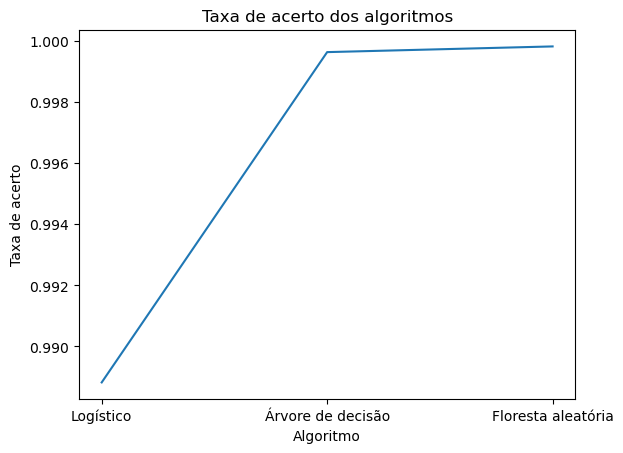

In [20]:
# Cria um gráfico de linhas
plt.plot(["Logístico", "Árvore de decisão", "Floresta aleatória"], [lr_accuracy, dt_accuracy, rf_accuracy])
plt.xlabel("Algoritmo")
plt.ylabel("Taxa de acerto")
plt.title("Taxa de acerto dos algoritmos")
plt.savefig('img_com_intervalo/accuracy_comparaty_plot.png', dpi=300, bbox_inches='tight')  # Salvar o gráfico em alta resolução (dpi=300)
plt.show()

In [21]:
# Cria um gráfico de linhas com atualizações intermediárias
def plot_accuracy(clf, X_train, y_train, X_test, y_test, update_interval=10, save_path='img_com_intervalo/trainamento_ml_accuracy_plot.png'):
    # Cria um array para armazenar a taxa de acerto
    train_accuracy = []
    test_accuracy = []

    # Treina o classificador
    clf.fit(X_train, y_train)

    # Inicializa um contador para controlar as atualizações do gráfico
    update_count = 0

    # Número máximo de iterações (ajuste conforme necessário)
    max_iterations = 100000 #len(X_train)

    # Faz previsões com o classificador
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calcula a taxa de acerto para cada iteração
    for i in range(len(X_train)):
        # Atualiza o gráfico em intervalos regulares
        if i < 10000:
            i = 10000
        
        if i <= max_iterations - 1:
            train_accuracy.append(accuracy_score(y_train[:i], y_pred_train[:i]))
            test_accuracy.append(accuracy_score(y_test[:i], y_pred_test[:i]))
            i = i + 1000
        else:
            break
    
    plt.plot(train_accuracy, label="Evolução com Dataset de Treinamento")
    plt.plot(test_accuracy, label="Evolução com Dataset de Teste após treinamento")
    plt.xlabel("Número de decisões")
    plt.ylabel("Taxa de acerto")

    # Obtenha todas as legendas e handles
    handles, labels = plt.gca().get_legend_handles_labels()

    # Crie uma nova lista de legendas e handles contendo apenas as últimas duas legendas
    new_handles = handles[-2:]
    new_labels = labels[-2:]

    # Crie a nova legenda
    plt.legend(new_handles, new_labels)
    plt.ion()
    display(plt.gcf())
    clear_output(wait=True)

    # Atualiza o contador de atualizações
    update_count += update_interval
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Salvar o gráfico em alta resolução (dpi=300)
            

In [22]:
# Chama a função para plotar o gráfico
#plot_accuracy(lr, X_train, y_train, X_test, y_test, update_interval=100, save_path='trainamento_ml_Logistico_accuracy_plot.png')

In [23]:
# Chama a função para plotar o gráfico
#plot_accuracy(dt, X_train, y_train, X_test, y_test, update_interval=100, save_path='trainamento_ml_tree_accuracy_plot.png')

In [24]:
# Chama a função para plotar o gráfico
#plot_accuracy(rf, X_train, y_train, X_test, y_test, update_interval=100, save_path='trainamento_ml_RandomForest_accuracy_plot.png')

# Regressão linear

In [25]:
# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Label']

# Remova espaços em branco dos nomes das colunas
dados_tr.columns = dados_tr.columns.str.strip()


# Verifique se todas as colunas selecionadas estão no DataFrame
if set(colunas_selecionadas).issubset(dados_tr.columns):
    # Selecionar apenas as colunas desejadas
    df_dados3 = dados_tr[colunas_selecionadas]
    # Remover colunas duplicadas
    df_dados3 = df_dados3.loc[:,~df_dados3.columns.duplicated()]
    df_dados3 = df_dados3.dropna()
else:
    print(dados_tr.columns)
    print(dados_tr)
    print("Nomes das colunas selecionadas não correspondem às colunas no DataFrame.")

In [26]:
# Criar uma lista com todas as combinações possíveis de duas colunas, excluindo as repetidas
colunas = df_dados3.columns[:-1] # excluir a coluna Label
combinacoes = list(combinations(colunas, 2))

# Criar uma lista vazia para armazenar os resultados
resultados = []

# Criar um loop para iterar sobre as combinações
for x_col, y_col in combinacoes:
    # Separar as variáveis x e y do conjunto de dados
    x = df_dados3[x_col].values.reshape(-1, 1)
    y = df_dados3[y_col].values.reshape(-1, 1)

    # Criar e treinar um modelo de regressão linear
    model = LinearRegression()
    model.fit(x, y)

    # Fazer previsões com o modelo treinado
    y_pred = model.predict(x)

    # Calcular a acurácia do modelo
    r2 = r2_score(y, y_pred)

    # Armazenar o nome das colunas, o modelo, e a acurácia em uma lista
    resultados.append((x_col, y_col, model, r2))

In [27]:
# Criar uma função para encontrar a maior acurácia entre todos os modelos
def melhor_regressao(resultados):
    # Inicializar a maior acurácia com um valor baixo
    maior_r2 = -1
    # Inicializar as variáveis para armazenar o melhor resultado
    melhor_x = None
    melhor_y = None
    melhor_modelo = None
    # Criar um loop para iterar sobre os resultados
    for x_col, y_col, model, r2 in resultados:
        # Se a acurácia atual for maior que a maior acurácia
        if r2 > maior_r2:
            # Atualizar a maior acurácia com a acurácia atual
            maior_r2 = r2
            # Atualizar as variáveis com o melhor resultado
            melhor_x = x_col
            melhor_y = y_col
            melhor_modelo = model
    # Retornar o melhor resultado
    return melhor_x, melhor_y, melhor_modelo, maior_r2


In [28]:
# Mostrar o resultado da função
melhor_x, melhor_y, melhor_modelo, maior_r2 = melhor_regressao(resultados)

In [29]:
print("A melhor regressão linear é entre as colunas", melhor_x, "e", melhor_y)
print("O modelo é:", melhor_modelo)
print("A acurácia é:", maior_r2)

A melhor regressão linear é entre as colunas Fwd Packet Length Mean e Protocol
O modelo é: LinearRegression()
A acurácia é: 0.03515401946520602


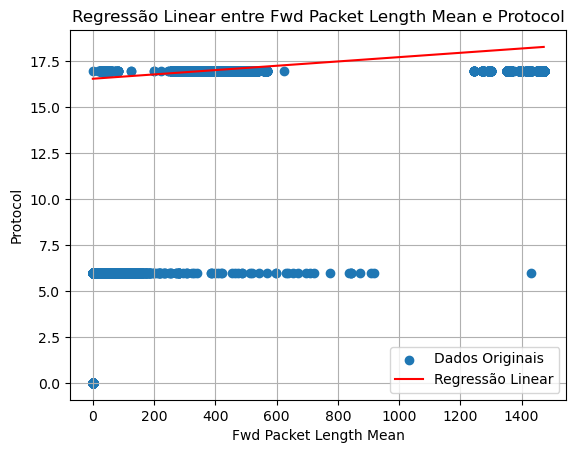

In [30]:
# Dados originais
x_col_data = df_dados3[melhor_x].values
y_col_data = df_dados3[melhor_y].values

# Linha de regressão
x = np.linspace(min(x_col_data), max(x_col_data), 100)
y_pred = melhor_modelo.predict(x.reshape(-1, 1))

plt.scatter(x_col_data, y_col_data, label='Dados Originais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel(melhor_x)
plt.ylabel(melhor_y)
plt.legend()
plt.grid(True)
plt.title("Regressão Linear entre {} e {}".format(melhor_x, melhor_y))
plt.savefig("img_com_intervalo/regressao_Linear_entre_colunas.png".format(melhor_x, melhor_y))
plt.show()

# Teste com a base completa

In [31]:
dados_tr2 = amostra
dados_tr2.reset_index(drop=True, inplace=True)

# Lista das colunas a serem selecionadas
#colunas_selecionadas = ['Fwd Packet Length Std', 'Packet Length Std', 'Fwd IAT Mean', 'min_seg_size_forward',
#                        'Fwd IAT Max', 'Destination Port', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
#                        'Fwd Packet Length Min', 'Protocol', 'Timestamp', 'Label']

# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Timestamp', 'Label']

# Remova espaços em branco dos nomes das colunas
dados_tr2.columns = dados_tr2.columns.str.strip()


# Verifique se todas as colunas selecionadas estão no DataFrame
if set(colunas_selecionadas).issubset(dados_tr2.columns):
    # Selecionar apenas as colunas desejadas
    df_dados2 = dados_tr2[colunas_selecionadas]
    # Remover colunas duplicadas
    df_dados2 = df_dados2.dropna()

    # Mostrar todas as colunas disponíveis no novo DataFrame
    print("Colunas Selecionadas:")
    print(df_dados2.columns)
    print("\n")
    display(df_dados2)
else:
    print(dados_tr2.columns)
    print(dados_tr2)
    print("Nomes das colunas selecionadas não correspondem às colunas no DataFrame.")


# Converta a coluna 'Timestamp' para objetos datetime
df_dados2['Timestamp'] = pd.to_datetime(df_dados2['Timestamp'])

# Calcule o número de segundos desde a época Unix
df_dados2['Timestamp_seconds'] = (df_dados2['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Preparar os dados
X = df_dados2.drop('Label', axis=1)
X = X.drop('Timestamp', axis=1)
y = df_dados2['Label']



Colunas Selecionadas:
Index(['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward',
       'Destination Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')




,Fwd Packet Length Mean,Fwd IAT Mean,min_seg_size_forward,Destination Port,Protocol,Timestamp,Label
0,348.0,43679.000000,-1,6652,17,2018-12-01 12:36:57.628026,DrDoS_UDP
1,349.5,36073.000000,-1,9712,17,2018-12-01 12:36:57.628076,DrDoS_UDP
2,359.5,34859.666667,-1,4680,17,2018-12-01 12:36:57.628164,DrDoS_UDP
3,386.0,36989.000000,-1,2644,17,2018-12-01 12:36:57.628166,DrDoS_UDP
4,383.0,1.000000,-1,16901,17,2018-12-01 12:36:57.628217,DrDoS_UDP
...,...,...,...,...,...,...,...
3136797,401.0,2.000000,20,6479,17,2018-12-01 13:04:45.928050,DrDoS_UDP
3136798,401.0,1.000000,20,33462,17,2018-12-01 13:04:45.928055,DrDoS_UDP
3136799,321.0,2.000000,20,22593,17,2018-12-01 13:04:45.928173,DrDoS_UDP
3136800,375.0,2.000000,20,46618,17,2018-12-01 13:04:45.928225,DrDoS_UDP


In [32]:
# Dividir os dados em treino e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Fazer previsões com o classificador logístico
y_pred_lr2 = lr.predict(X_test2)

# Fazer previsões com a árvore de decisão
y_pred_dt2 = dt.predict(X_test2)

# Fazer previsões com a floresta aleatória
y_pred_rf2 = rf.predict(X_test2)

# Avaliar os classificadores
print('')
print('Classificador logístico:')
print(classification_report(y_test2, y_pred_lr2))
print(confusion_matrix(y_test2, y_pred_lr2))

print('')
print('Árvore de decisão:')
print(classification_report(y_test2, y_pred_dt2))
print(confusion_matrix(y_test2, y_pred_dt2))

print('')
print('Floresta aleatória:')
print(classification_report(y_test2, y_pred_rf2))
print(confusion_matrix(y_test2, y_pred_rf2))


Classificador logístico:
              precision    recall  f1-score   support

      BENIGN       0.84      0.16      0.27       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00    784201
   macro avg       0.92      0.58      0.63    784201
weighted avg       1.00      1.00      1.00    784201

[[    84    447]
 [    16 783654]]

Árvore de decisão:
              precision    recall  f1-score   support

      BENIGN       0.66      0.93      0.78       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00    784201
   macro avg       0.83      0.97      0.89    784201
weighted avg       1.00      1.00      1.00    784201

[[   496     35]
 [   250 783420]]

Floresta aleatória:
              precision    recall  f1-score   support

      BENIGN       0.84      0.99      0.91       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00  

# Análise de Importância dos Recursos com Floresta Aleatória

In [34]:
# Obtenha a importância dos recursos
importances = rf.feature_importances_

# Obtenha o desvio padrão das importâncias dos recursos entre as árvores na floresta aleatória
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Organize os índices dos recursos por importância
indices = np.argsort(importances)[::-1]

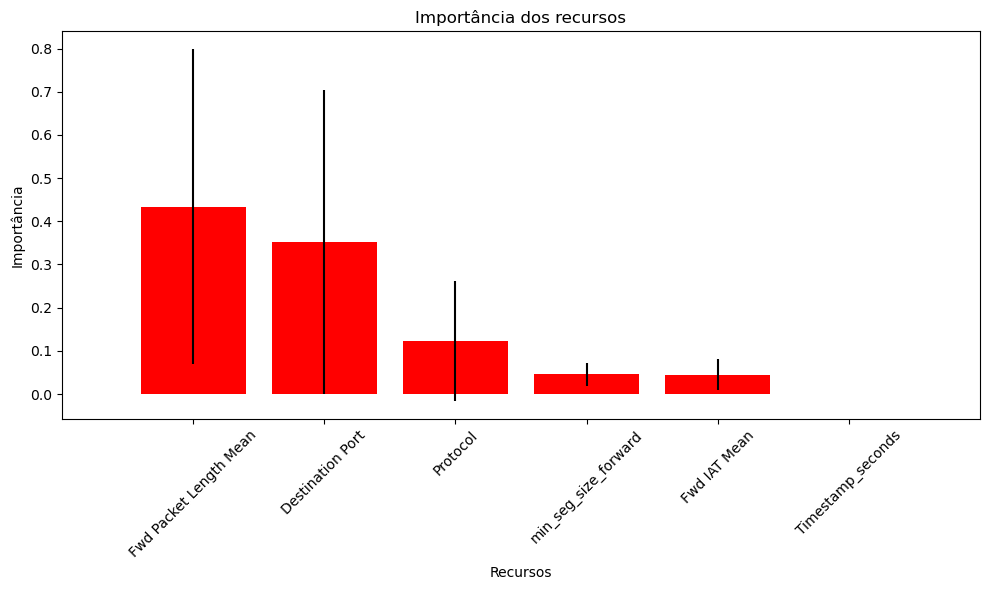

In [38]:
# Gere o gráfico de importância dos recursos
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura
plt.title("Importância dos recursos")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)  # Rote os rótulos do eixo x em 45 graus
plt.xlim([-1, X.shape[1]])
plt.xlabel('Recursos')  # Adicione um rótulo ao eixo x
plt.ylabel('Importância')  # Adicione um rótulo ao eixo y
plt.tight_layout()  # Ajuste automaticamente o layout para que todos os elementos caibam na figura
# Salvar o gráfico como uma imagem (por exemplo, em formato PNG)
plt.savefig('img_com_intervalo/importancia_dos_recursos.png')
plt.show()

# Verificar Overffiting

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)


In [38]:
# Definir diferentes números de nós terminais
num_nos_terminais = list(range(2, 41))

# Listas para armazenar os índices Gini de treinamento e teste
train_ginis = []
test_ginis = []

In [39]:
for num in num_nos_terminais:
    # Criar o modelo Random Forest com o número de árvores (nós terminais)
    rf_model = RandomForestClassifier(n_estimators=num, random_state=42)
    rf_model.fit(X_train3, y_train3)

    # Calcular índice Gini de treinamento
    train_gini = 1 - rf_model.score(X_train3, y_train3)
    train_ginis.append(train_gini)

    # Calcular índice Gini de teste
    test_gini = 1 - rf_model.score(X_test3, y_test3)
    test_ginis.append(test_gini)

In [40]:
# Encontrar o número mínimo de árvores associado ao menor índice Gini de teste
min_test_score_idx = np.argmin(test_gini)
min_test_score_nodes = num_nos_terminais[min_test_score_idx]


print(f"Número mínimo de árvores associado: {min_test_score_nodes}")

Número mínimo de árvores associado: 2


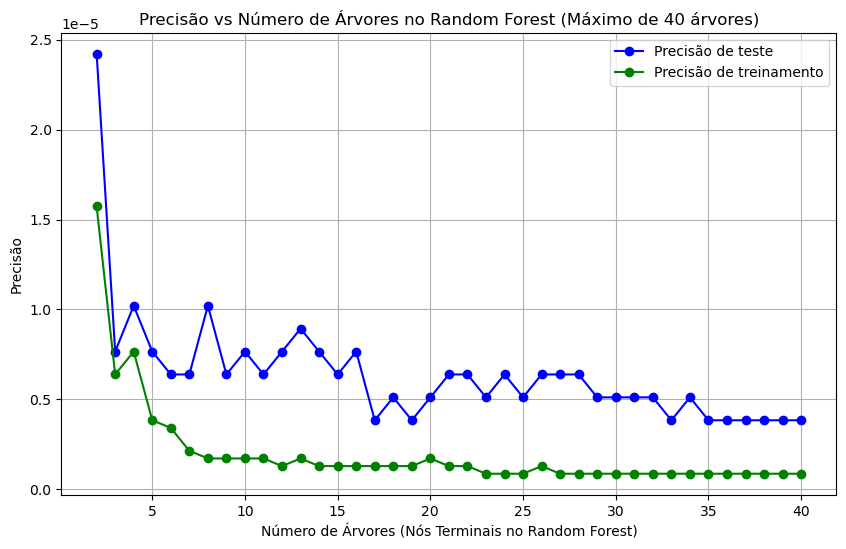

In [41]:
# Plotar os índices Gini de treinamento e teste versus o número de árvores
plt.figure(figsize=(10, 6))

# Linha representando o índice Gini de teste
plt.plot(num_nos_terminais, test_ginis, marker='o', color='blue', label='Precisão de teste')

# Linha representando o índice Gini de treinamento (resubstituição)
plt.plot(num_nos_terminais, train_ginis, marker='o', color='green', label='Precisão de treinamento')

plt.xlabel('Número de Árvores (Nós Terminais no Random Forest)')
plt.ylabel('Precisão')
plt.title('Precisão vs Número de Árvores no Random Forest (Máximo de 40 árvores)')
plt.legend()
plt.grid(True)
# Salvar o gráfico como uma imagem (por exemplo, em formato PNG)
plt.savefig('img_com_intervalo/grafico_indice_Precisao_num_nos.png')
plt.show()